In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
pd.set_option("display.precision", 1)
import os
import tabulate
from Constants import *

c:\Users\dell\miniconda3\envs\tf_cpu\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# Showing top rated movies and top genres

top_rated

,movie id,num ratings,ave rating,title,genres
0,4993,198,4.1,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
1,5952,188,4.0,"Lord of the Rings: The Two Towers, The",Adventure|Fantasy
2,7153,185,4.1,"Lord of the Rings: The Return of the King, The",Action|Adventure|Drama|Fantasy
3,4306,170,3.9,Shrek,Adventure|Animation|Children|Comedy|Fantasy|Ro...
4,58559,149,4.2,"Dark Knight, The",Action|Crime|Drama
5,6539,149,3.8,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
6,79132,143,4.1,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller
7,6377,141,4.0,Finding Nemo,Adventure|Animation|Children|Comedy
8,4886,132,3.9,"Monsters, Inc.",Adventure|Animation|Children|Comedy|Fantasy
9,7361,131,4.2,Eternal Sunshine of the Spotless Mind,Drama|Romance|Sci-Fi


In [3]:
top_genres

,genre,num movies,ave rating/genre,ratings per genre
0,Action,321,3.4,10377
1,Adventure,234,3.4,8785
2,Animation,76,3.6,2588
3,Children,69,3.4,2472
4,Comedy,326,3.4,8911
5,Crime,139,3.5,4671
6,Documentary,13,3.8,280
7,Drama,342,3.6,10201
8,Fantasy,124,3.4,4468
9,Horror,56,3.2,1345


In [4]:
# Load data
train_item, train_user, y_train, item_features, user_features, item_vecs, movie_dict, user_to_genre = load_data()

# Remove userid, rating count, ave rating and movie id during training
user_features_num = train_user.shape[1] - 3 
item_features_num = train_item.shape[1] - 1

# Define user and item genre vectors
u_vecs = 3
i_vecs = 3

# User and item columns to use in training
u_startcols = 3
i_startcols = 1

print(f"Training vectors, item: {len(train_item)}")
print(f"Training vectors, user: {len(train_user)}")

Training vectors, item: 50884
Training vectors, user: 50884


In [5]:
# Viewing entries in user training array
pprint_train(train_user, user_features, u_vecs, u_startcols, maxcount = 5)

[user id],[rating count],[rating ave],Act ion,Adve nture,Anim ation,Chil dren,Com edy,Crime,Docum entary,Drama,Fan tasy,Hor ror,Mys tery,Rom ance,Sci -Fi,Thri ller
2,22,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
2,22,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
2,22,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
2,22,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
2,22,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9


In [6]:
# Viewing entries in movie training array
pprint_train(train_item, item_features, i_vecs, i_startcols,maxcount = 5)

[movie id],year,ave rating,Act ion,Adve nture,Anim ation,Chil dren,Com edy,Crime,Docum entary,Drama,Fan tasy,Hor ror,Mys tery,Rom ance,Sci -Fi,Thri ller
6874,2003,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8798,2004,3.8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
46970,2006,3.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48516,2006,4.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
58559,2008,4.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(f"y_train[:5]: {y_train[:5]}")

y_train[:5]: [4.  3.5 4.  4.  4.5]


In [8]:
# Scaling training data
unscaled_item_train = train_item
unscaled_user_train = train_user
unscaled_y_train = y_train

Itemscaler = StandardScaler()
Itemscaler.fit(train_item)
train_item = Itemscaler.transform(train_item)

Userscaler = StandardScaler()
Userscaler.fit(train_user)
train_user = Userscaler.transform(train_user)

Targetscaler = MinMaxScaler((-1, 1))
Targetscaler.fit(y_train.reshape(-1, 1))
y_train = Targetscaler.transform(y_train.reshape(-1, 1))

print(np.allclose(unscaled_item_train, Itemscaler.inverse_transform(train_item)))
print(np.allclose(unscaled_user_train, Userscaler.inverse_transform(train_user)))

True
True


In [9]:
# Splitting and shuffling data for training
train_item, test_item = train_test_split(train_item, train_size = 0.75, shuffle = True, random_state = 152)
train_user, test_user = train_test_split(train_user, train_size = 0.75, shuffle = True, random_state = 152)
y_train, y_test = train_test_split(y_train, train_size = 0.75, shuffle = True, random_state = 152)

print(train_item.shape)
print(test_item.shape)
print(train_user.shape)
print(test_user.shape)
print(y_train.shape)
print(y_test.shape)


(38163, 17)
(12721, 17)
(38163, 17)
(12721, 17)
(38163, 1)
(12721, 1)


In [10]:
pprint_train(train_user, user_features, u_vecs, u_startcols, maxcount = 5)

[user id],[rating count],[rating ave],Act ion,Adve nture,Anim ation,Chil dren,Com edy,Crime,Docum entary,Drama,Fan tasy,Hor ror,Mys tery,Rom ance,Sci -Fi,Thri ller
0,0,-0.8,-1.3,-1.3,-0.2,-1.4,-0.5,-0.9,0.8,-0.5,-0.7,1.0,-1.3,-0.2,-1.0,-1.3
-1,0,0.7,0.6,0.5,0.3,0.5,0.4,0.6,1.0,0.6,0.3,0.8,0.8,0.4,0.7,0.7
0,-1,1.7,-0.4,-0.5,1.0,-3.5,2.3,1.6,-1.2,1.6,1.6,-2.3,-4.7,1.6,-2.1,1.8
0,0,1.5,1.5,1.4,1.2,1.3,1.5,1.1,-1.2,1.2,1.1,1.4,1.2,1.2,1.1,1.2
-1,0,0.4,0.4,0.6,0.5,0.4,0.5,0.1,1.0,0.3,0.6,0.7,0.1,0.3,0.2,0.2


In [11]:
num_outputs = 32

# Model achitecture - User
user_Net = keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(num_outputs),
])

# Model achitecture - Item
item_Net =  keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(num_outputs),
])

In [12]:
# Create the user input and point to the base network
user_input = keras.Input(shape = (user_features_num))
u_vec = user_Net(user_input)
u_vec = tf.linalg.l2_normalize(u_vec, axis = 1)

# Create the item input and point to the base network
item_input = keras.Input(shape = (item_features_num))
i_vec = item_Net(item_input)
i_vec = tf.linalg.l2_normalize(i_vec, axis = 1)

# Compute dot product pof user and movie/item vector
output = tf.keras.layers.Dot(axes = 1)([u_vec, i_vec])

# Specify inputs and outputs of the model
model = tf.keras.Model([user_input, item_input], output)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32)           308384      ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 32)           308896      ['input_2[0][0]']                
                                                                                              

In [13]:
# Compile model

tf.random.set_seed(1)
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    loss = 'mean_squared_error',
    #metrics = ['accuracy']
)

In [14]:
# Fit model

history = model.fit([
    train_user[:, u_startcols:], train_item[:, i_startcols:]
    ],
          y_train,
          epochs = 30,
          batch_size = 64,
          verbose = 2)

Epoch 1/30
597/597 - 17s - loss: 0.1328 - 17s/epoch - 29ms/step
Epoch 2/30
597/597 - 10s - loss: 0.1138 - 10s/epoch - 16ms/step
Epoch 3/30
597/597 - 11s - loss: 0.1113 - 11s/epoch - 19ms/step
Epoch 4/30
597/597 - 11s - loss: 0.1094 - 11s/epoch - 18ms/step
Epoch 5/30
597/597 - 10s - loss: 0.1080 - 10s/epoch - 17ms/step
Epoch 6/30
597/597 - 10s - loss: 0.1072 - 10s/epoch - 17ms/step
Epoch 7/30
597/597 - 10s - loss: 0.1063 - 10s/epoch - 16ms/step
Epoch 8/30
597/597 - 10s - loss: 0.1056 - 10s/epoch - 16ms/step
Epoch 9/30
597/597 - 11s - loss: 0.1051 - 11s/epoch - 19ms/step
Epoch 10/30
597/597 - 10s - loss: 0.1041 - 10s/epoch - 17ms/step
Epoch 11/30
597/597 - 10s - loss: 0.1028 - 10s/epoch - 17ms/step
Epoch 12/30
597/597 - 10s - loss: 0.1020 - 10s/epoch - 17ms/step
Epoch 13/30
597/597 - 10s - loss: 0.1019 - 10s/epoch - 17ms/step
Epoch 14/30
597/597 - 10s - loss: 0.1004 - 10s/epoch - 17ms/step
Epoch 15/30
597/597 - 10s - loss: 0.0995 - 10s/epoch - 17ms/step
Epoch 16/30
597/597 - 10s - loss: 

In [15]:
# Evaluate model
model.evaluate([
    test_user[:, u_startcols:], test_item[:, i_startcols:]],
               y_test,
               batch_size = 32,
               verbose = 0)

0.09413930028676987

In [16]:
#history.history

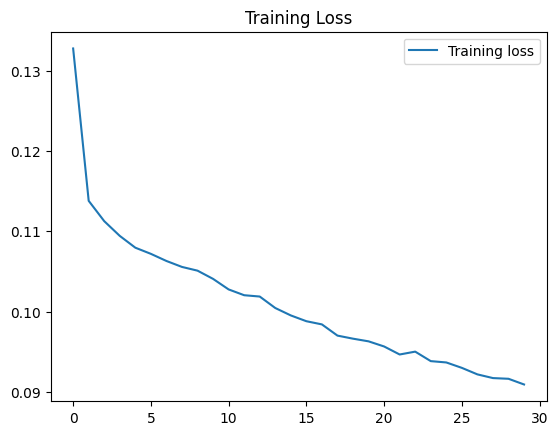

In [17]:
loss = history.history['loss']

plt.plot(loss, label = "Training loss")
plt.legend(loc = 'upper right')
plt.title("Training Loss")
plt.show()

In [18]:
#os.exit()
# Define new parameters for a user to make prediction
new_user_id = 5000
new_rating_ave = 0.0
new_action = 0.0
new_adventure = 5.0
new_animation = 0.0
new_childrens = 0.0
new_comedy = 0.0
new_crime = 0.0
new_documentary = 0.0
new_drama = 0.0
new_fantasy = 5.0
new_horror = 0.0
new_mystery = 0.0
new_romance = 0.0
new_scifi = 0.0
new_thriller = 0.0
new_rating_count = 3

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_action, new_adventure, new_animation, new_childrens,
                      new_comedy, new_crime, new_documentary,
                      new_drama, new_fantasy, new_horror, new_mystery,
                      new_romance, new_scifi, new_thriller]])

In [19]:
#Replicate user vector to match movie number 
user_vecs = gen_user_vecs(user_vec, len(item_vecs))

# Scale user and item vectors
scaled_user_vec = Userscaler.transform(user_vecs)
scaled_item_vec = Itemscaler.transform(item_vecs)

# Predict
y_pred = model.predict([scaled_user_vec[:, u_startcols:], scaled_item_vec[:, i_startcols:]])

# Unscale prediction
y_pred_unscaled = Targetscaler.inverse_transform(y_pred)

# Sort predictions in descending order
sorted_index = np.argsort(-y_pred, axis = 0).reshape(-1).tolist()
sorted_y_pred_unscaled = y_pred_unscaled[sorted_index]
sorted_items = item_vecs[sorted_index]

print_pred_movies(sorted_y_pred_unscaled, sorted_items, movie_dict, maxcount = 10)

27/27 [==============================] - 2s 5ms/step


y_pred,movie_id,avg rating,title,genres
3.8,6283,3.9,Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku no Tobira) (2001),Action|Animation|Sci-Fi|Thriller
3.7,137857,3.6,The Jungle Book (2016),Adventure|Drama|Fantasy
3.6,4896,3.8,Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),Adventure|Children|Fantasy
3.6,54001,3.9,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy
3.6,90866,3.8,Hugo (2011),Children|Drama|Mystery
3.6,88125,3.9,Harry Potter and the Deathly Hallows: Part 2 (2011),Action|Adventure|Drama|Fantasy|Mystery
3.6,98809,3.8,"Hobbit: An Unexpected Journey, The (2012)",Adventure|Fantasy
3.6,5816,3.6,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
3.6,59501,3.5,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy
3.6,106489,3.6,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy


In [20]:
#Predicting for user with id 2
user_id = 2

# Form custom user vector
user_vecs, y_vecs = get_user_vecs(user_id, unscaled_user_train, item_vecs, user_to_genre)

# Scale movie and item vectors
scaled_user_vec = Userscaler.transform(user_vecs)
scaled_item_vec = Itemscaler.transform(item_vecs)

# Make predictions
y_pred = model.predict([scaled_user_vec[:, u_startcols:], scaled_item_vec[:, i_startcols:]])

# Unscale predictions
y_pred_unscaled = Targetscaler.inverse_transform(y_pred)

# Sort results
# Negate to get largest rating first and display unscaled vectors
sorted_index = np.argsort(-y_pred, axis = 0).reshape(-1).tolist() 
sorted_y_pred_unscaled = y_pred_unscaled[sorted_index]
sorted_items = item_vecs[sorted_index]
sorted_user = user_vecs[sorted_index]
sorted_y = y_vecs[sorted_index]

# Display sorted rating for movies rated by the user
print_existing_user(sorted_y_pred_unscaled, sorted_y.reshape(-1, 1), sorted_user, sorted_items, i_vecs, u_vecs, movie_dict, maxcount = 10)

27/27 [==============================] - 0s 5ms/step


y_pred,y,user,avg user genre,avg movie rating,movie id,title,genres
4.3,5.0,2,[4.0],4.3,80906,Inside Job (2010),Documentary
4.3,4.0,2,"[4.0,4.1,3.9]",4.0,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
4.2,4.0,2,"[4.1,4.0,3.9]",4.3,48516,"Departed, The (2006)",Crime|Drama|Thriller
4.2,4.5,2,"[4.0,4.1,4.0]",4.2,58559,"Dark Knight, The (2008)",Action|Crime|Drama
4.2,4.5,2,"[4.0,4.0]",4.1,68157,Inglourious Basterds (2009),Action|Drama
4.2,3.5,2,"[4.0,4.0]",3.9,99114,Django Unchained (2012),Action|Drama
4.2,4.0,2,[4.0],4.0,112552,Whiplash (2014),Drama
4.2,4.5,2,"[4.1,4.0,3.9]",4.0,80489,"Town, The (2010)",Crime|Drama|Thriller
4.2,3.5,2,"[4.0,3.9,3.9]",3.9,115713,Ex Machina (2015),Drama|Sci-Fi|Thriller
4.1,4.0,2,"[4.0,4.1,4.0,4.0,3.9,3.9]",4.1,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller


In [21]:
# Compute the square distance between vectors, to compute similarities
def sqr_dist(a, b):
    d = np.sum(np.square(b - a))
    return d

In [22]:
# Display square distance between sample vectors
a1 = np.array([1.0, 2.0, 3.0])
a2 = np.array([1.1, 2.1, 3.1])
a3 = np.array([0, 1, 0])
b1 = np.array([1.0, 2.0, 3.0])
b2 = np.array([1.0, 2.0, 3.0])
b3 = np.array([1, 0, 0])

print(f"Squared distance between a1 and b1: {sqr_dist(a1, b1):0.3f}")

Squared distance between a1 and b1: 0.000


In [23]:
# Generate movie vectors from already trained model
input_movie_item = layers.Input(shape = (item_features_num))
movie_vec = item_Net(input_movie_item)
movie_vec = tf.linalg.l2_normalize(movie_vec, axis = 1)
new_model = keras.Model(input_movie_item, movie_vec)
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16)]              0         
                                                                 
 sequential_1 (Sequential)   (None, 32)                308896    
                                                                 
 tf.math.l2_normalize_2 (TFO  (None, 32)               0         
 pLambda)                                                        
                                                                 
Total params: 308,896
Trainable params: 306,592
Non-trainable params: 2,304
_________________________________________________________________


In [24]:
# Scale and make predictions
scaled_item_vec = Itemscaler.transform(item_vecs)
pred_movie_vec = new_model.predict(scaled_item_vec[:, i_startcols:])
print(f"Size of predicted movie feature vectors: {pred_movie_vec.shape}")

27/27 [==============================] - 1s 5ms/step
Size of predicted movie feature vectors: (847, 32)


In [25]:
# Compute minimum distance between vectors to find similar movies
count = 10
dim = len(pred_movie_vec)
dist = np.zeros((dim, dim))

for i in range(dim):
    for j in range(dim):
        dist[i, j] = sqr_dist(pred_movie_vec[i, :], pred_movie_vec[j, :])

# Use masked arrays to avoid selecting the same movie        
min_dist = ma.masked_array(dist, mask = np.identity(dist.shape[0]))

disp = [["Movie 1", "Genres", "Movie 2", "Genres"]]
for i in range(count):
    min_indx = np.argmin(min_dist[i])
    movie1_id = int(item_vecs[i, 0])
    movie2_id = int(item_vecs[min_indx, 0])
    disp.append(
        [movie_dict[movie1_id]['title'], movie_dict[movie1_id]["genres"],
         movie_dict[movie2_id]['title'], movie_dict[movie2_id]['genres']]
    )
    
table = tabulate.tabulate(disp, tablefmt = 'html', headers = "firstrow")
table

Movie 1,Genres,Movie 2,Genres
Save the Last Dance (2001),Drama|Romance,Mona Lisa Smile (2003),Drama|Romance
"Wedding Planner, The (2001)",Comedy|Romance,"Sweetest Thing, The (2002)",Comedy|Romance
Hannibal (2001),Horror|Thriller,Final Destination 2 (2003),Horror|Thriller
Saving Silverman (Evil Woman) (2001),Comedy|Romance,"Wedding Planner, The (2001)",Comedy|Romance
Down to Earth (2001),Comedy|Fantasy|Romance,Evan Almighty (2007),Comedy|Fantasy
"Mexican, The (2001)",Action|Comedy,Rush Hour 2 (2001),Action|Comedy
15 Minutes (2001),Thriller,Panic Room (2002),Thriller
Enemy at the Gates (2001),Drama,Gangs of New York (2002),Crime|Drama
Heartbreakers (2001),Comedy|Crime|Romance,Joe Dirt (2001),Adventure|Comedy|Mystery|Romance
Spy Kids (2001),Action|Adventure|Children|Comedy,Scooby-Doo (2002),Adventure|Children|Comedy|Fantasy|Mystery
